# **Table of Contents**

## 1. [Read and expolore data](#scrollTo=xSSnUXwVi8Br)

1.   [Importing Packages](#scrollTo=FgVr8wDFflWJ)
2.   [Reading the dataset](#scrollTo=Sus2wKghf_Ic)

## 2. [EDA](#scrollTo=HXbi9LSJK7uP)

1.   [Reading the data from CSV file](#scrollTo=8NFBxAGeT9Bs)
2. [Data Visualization using Bar Graph](#scrollTo=SLY-FV2TViXq)
3. [Example of clean comment](#scrollTo=89bCmPD_Bv3Q)
4. [Example of Toxic comment](#scrollTo=qjUXpRdpByf7)
5. [Correlation matrix](#scrollTo=GSklMBR-BfTH)
6. [Generating a word cloud](#scrollTo=q1AfwXXPsJPX)
7. [Text cleaning (tokenizen lemmatize, mormalize, remove punctuations, remove stop words, filter non-ascii characters)](#scrollTo=x0D8Ie2xEfp1)
8. [Using TfIdf Vectorizer to find out relevancy of each word](#scrollTo=gEPa-ZftHuYY)

## 3. [Creating baseline models with default parameters](#scrollTo=cOqeNLEsuwce)

## 4. [Parameter Optimization using GridSearchCV](#scrollTo=vLOsjc_BUZR4)

## 1. Read and explore data

1.   Importing Packages



In [ ]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn import metrics

import statistics
from sklearn.metrics import recall_score

from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

2.   Reading the dataset


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_y = pd.read_csv("test_labels.csv")

## 2. EDA

1. Reading the data from CSV file

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_y.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
train.shape

(159571, 8)

In [ ]:
#Check for missong values in train dataset
null_check=train.isnull().sum()
print(null_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
len_of_text      0
clean            0
dtype: int64


In [ ]:
test.shape

(153164, 2)

2. Data Visualization using Bar Graph

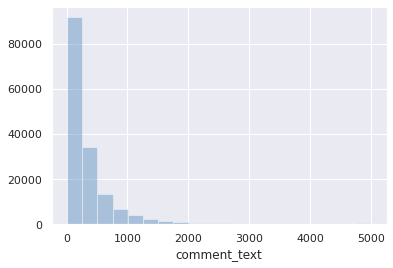

In [ ]:
sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [ ]:
# Before preprocessing text, check text length distribution
train['len_of_text'] = train['comment_text'].apply(len)

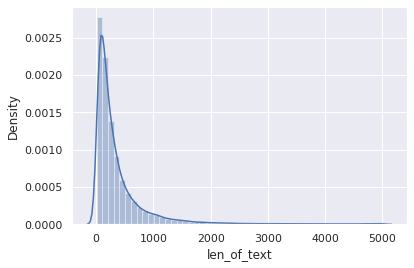

In [ ]:
# Visualize text length distribution
sns.set_style("darkgrid")
sns.distplot(train['len_of_text'],kde=True)
plt.show()

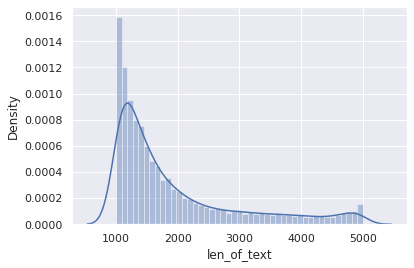

In [ ]:
# Visualizing text lengths greater than 1000
pl = train.loc[train['len_of_text'] > 1000,'len_of_text']
sns.distplot(pl,kde=True)
plt.show()

In [ ]:
# Subsetting labels from the training data
train_labels = train[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()
print(label_count)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


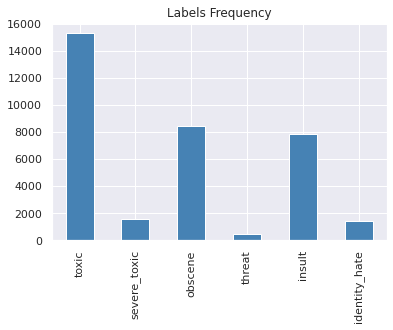

In [ ]:
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

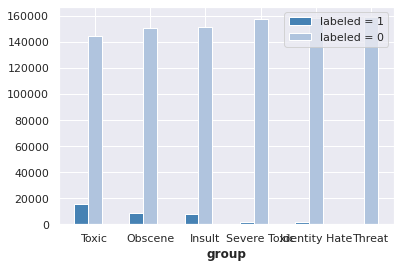

In [ ]:
# Code to draw bar graph for visualising distribution of classes within each label.
barWidth = 0.25

bars1 = [sum(train['toxic'] == 1), sum(train['obscene'] == 1), sum(train['insult'] == 1), sum(train['severe_toxic'] == 1),
         sum(train['identity_hate'] == 1), sum(train['threat'] == 1)]
bars2 = [sum(train['toxic'] == 0), sum(train['obscene'] == 0), sum(train['insult'] == 0), sum(train['severe_toxic'] == 0),
         sum(train['identity_hate'] == 0), sum(train['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()

3. Example of clean comment

In [ ]:
# example of clean comment
train.comment_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

4. Example of Toxic comment

In [ ]:
# example of toxic comment
train[train.toxic == 1].iloc[1, 1]

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

5. Correlation matrix

  ##### Which tags go together?
  ##### Now let's have a look at how often the tags occur together. A good indicator of that would be a correlation plot.

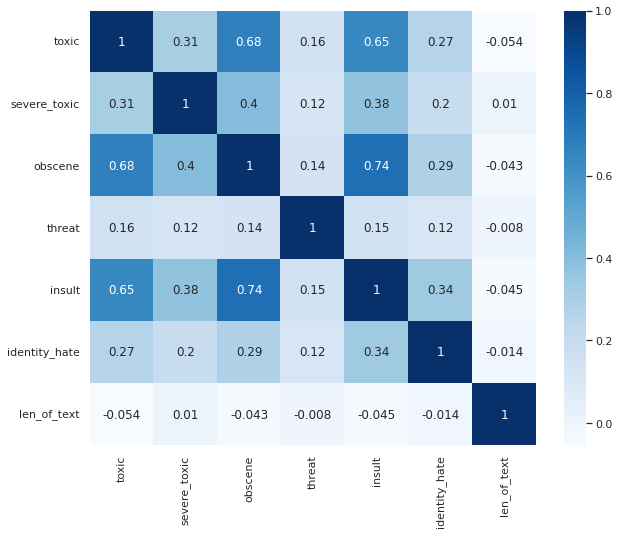

In [ ]:
# Cross correlation matrix across labels
rowsums = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

6. Generating a word cloud

In [ ]:
def W_Cloud(token):
    """
    Visualize the most common words contributing to the token.
    """
    threat_context = train[train[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words assosiated with {token} comment", size=20)
    plt.show()

Choose a class to visualize the most common words contributing to the class:obscene


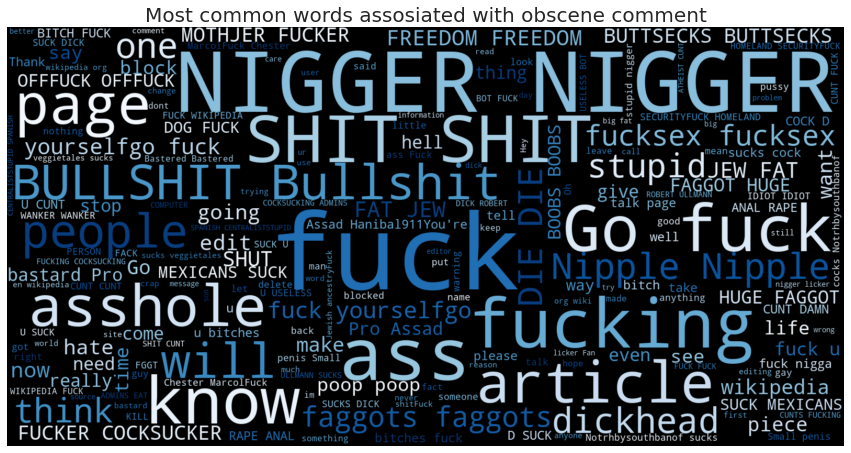

In [ ]:
# interactive visual : enter the label name.
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
W_Cloud(token.lower())


In [ ]:
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

7. Text cleaning (tokenizen lemmatize, mormalize, remove punctuations, remove stop words, filter non-ascii characters)

In [ ]:
def tokenize(text):
    '''
    Tokenize text and return a non-unique list of tokenized words found in the text. 
    Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
    Lemmatize the words and lastly drop words of length < 3.
    '''
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')
    # remove any non ascii
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    words = [w for w in words if len(w) > 2]
    return words

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

8. Using TfIdf Vectorizer to find out relevancy of each word

In [ ]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X_train = vector.fit_transform(train['comment_text'])
X_test = vector.transform(test['comment_text'])

In [ ]:
print(X_train)

  (0, 14368)	0.2548244051410454
  (0, 12144)	0.0873099317151128
  (0, 16772)	0.09207838069261645
  (0, 16923)	0.16669956495702393
  (0, 14119)	0.15141714403736992
  (0, 5195)	0.10582810628196589
  (0, 6271)	0.24769445969005244
  (0, 5172)	0.31763200709923645
  (0, 19033)	0.214774427959671
  (0, 11422)	0.1332413378680627
  (0, 18378)	0.24631112293263813
  (0, 7118)	0.25178740854229364
  (0, 3068)	0.28348355688525895
  (0, 9365)	0.09949928037616396
  (0, 18118)	0.15215758798427648
  (0, 18608)	0.23208423209922852
  (0, 14415)	0.16426041950821854
  (0, 6357)	0.19993888853370112
  (0, 10682)	0.32091832481459026
  (0, 7717)	0.28026764469831233
  (0, 18041)	0.1954350479796334
  (0, 5505)	0.13571311142228407
  (0, 6183)	0.1856637813965963
  (1, 18063)	0.20579763250409874
  (1, 9177)	0.2952979990538898
  :	:
  (159568, 13317)	0.44737042564747737
  (159568, 2493)	0.38803164256375144
  (159568, 14534)	0.3667008639246561
  (159568, 1055)	0.11879531109408607
  (159568, 196)	0.27572240536706627
  (

In [ ]:
print(X_test)

  (0, 18945)	0.11200985347977462
  (0, 18658)	0.28759488476636597
  (0, 18632)	0.1810847580345951
  (0, 17561)	0.25418777675529347
  (0, 17171)	0.08298194545183744
  (0, 17072)	0.0946796680442194
  (0, 16440)	0.24198529816020453
  (0, 15600)	0.2129317454675922
  (0, 15342)	0.13882560426236465
  (0, 14767)	0.1611719387290112
  (0, 14710)	0.2376893221351877
  (0, 14522)	0.09819279461620266
  (0, 13121)	0.19385112965269996
  (0, 11602)	0.2509055590047718
  (0, 11174)	0.14647703307999788
  (0, 10301)	0.12674996305761532
  (0, 9920)	0.07396299859513489
  (0, 9528)	0.19556853482074474
  (0, 7777)	0.2113453808269882
  (0, 7597)	0.12345914032863392
  (0, 6976)	0.19141261821749544
  (0, 6273)	0.1492380980069529
  (0, 5209)	0.12950531965051498
  (0, 4858)	0.21761066309326754
  (0, 2219)	0.16338334669378166
  :	:
  (153162, 9944)	0.09352901340890818
  (153162, 9720)	0.10204151516357089
  (153162, 9235)	0.11212810029058853
  (153162, 9111)	0.3567737436057306
  (153162, 9100)	0.08570084438980884
  

In [ ]:
vector.vocabulary_

{'explanation': 6183,
 'edits': 5505,
 'username': 18041,
 'hardcore': 7717,
 'metallica': 10682,
 'fan': 6357,
 'reverted': 14415,
 'weren': 18608,
 'vandalism': 18118,
 'just': 9365,
 'closure': 3068,
 'gas': 7118,
 'voted': 18378,
 'new': 11422,
 'york': 19033,
 'doll': 5172,
 'fac': 6271,
 'don': 5195,
 'remove': 14119,
 'template': 16923,
 'talk': 16772,
 'page': 12144,
 'retired': 14368,
 'aww': 1355,
 'match': 10472,
 'background': 1386,
 'colour': 3215,
 'seemingly': 15102,
 'stuck': 16349,
 'thanks': 17015,
 'january': 9177,
 'utc': 18063,
 'hey': 7933,
 'man': 10301,
 'really': 13752,
 'trying': 17540,
 'edit': 5492,
 'war': 18454,
 'guy': 7597,
 'constantly': 3609,
 'removing': 14121,
 'relevant': 14060,
 'information': 8709,
 'talking': 16781,
 'instead': 8826,
 'care': 2509,
 'formatting': 6806,
 'actual': 196,
 'info': 8701,
 'make': 10268,
 'real': 13736,
 'suggestion': 16475,
 'improvement': 8486,
 'wondered': 18859,
 'section': 15086,
 'statistic': 16153,
 'later': 969

In [ ]:
vector.get_feature_names()[0:20]

['aaa',
 'aap',
 'aardvark',
 'aaron',
 'aba',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abbas',
 'abbey',
 'abbott',
 'abbreviated',
 'abbreviation',
 'abc',
 'abcnews',
 'abd',
 'abducted',
 'abduction',
 'abdul']

## 3. Creating baseline models with default paramteres

In [ ]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf3 = RandomForestClassifier(n_estimators=10)

In [ ]:
def cross_validation_score(classifier, X_train, y_train):
    '''
    Iterate though each label and return the cross validation F1 and Recall score 
    '''
    methods = []
    name = classifier.__class__.__name__.split('.')[-1]

    for label in test_labels:
        recall = cross_val_score(
            classifier, X_train, y_train[label], cv=10, scoring='recall')
        f1 = cross_val_score(classifier, X_train,
                             y_train[label], cv=10, scoring='f1')
        methods.append([name, label, recall.mean(), f1.mean()])

    return methods

In [ ]:
# Calculating the cross validation F1 and Recall score for our 3 baseline models.
methods1_cv = pd.DataFrame(cross_validation_score(clf1, X_train, train))
methods2_cv = pd.DataFrame(cross_validation_score(clf2, X_train, train))
methods3_cv = pd.DataFrame(cross_validation_score(clf3, X_train, train))

In [59]:
# Creating a dataframe to show summary of results.
methods_cv = pd.concat([methods1_cv, methods2_cv, methods3_cv])
methods_cv.columns = ['Model', 'Label', 'Recall', 'F1']
meth_cv = methods_cv.reset_index()
meth_cv[['Model', 'Label', 'Recall', 'F1']]

,Model,Label,Recall,F1
0,LogisticRegression,toxic,0.610696,0.731487
1,LogisticRegression,severe_toxic,0.256431,0.351530
2,LogisticRegression,obscene,0.637002,0.747363
3,LogisticRegression,threat,0.123316,0.206632
4,LogisticRegression,insult,0.523546,0.638177
5,LogisticRegression,identity_hate,0.200750,0.310379
6,DecisionTreeClassifier,toxic,0.235648,0.377779
7,DecisionTreeClassifier,severe_toxic,0.033840,0.061390
8,DecisionTreeClassifier,obscene,0.410110,0.567512
9,DecisionTreeClassifier,threat,0.022917,0.043391


In [60]:

def score(classifier, X_train, y_train, X_test, y_test):
    """
    Calculate Hamming-loss, F1, Recall for each label on test dataset.
    """
    methods = []
    hloss = []
    name = classifier.__class__.__name__.split('.')[-1]
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']

    for label in test_labels:
        classifier.fit(X_train, y_train[label])
        predicted = classifier.predict(X_test)

        predict_df[label] = predicted

        recall = recall_score(y_test[y_test[label] != -1][label],
                              predicted[y_test[label] != -1],
                              average="weighted")
        f1 = f1_score(y_test[y_test[label] != -1][label],
                      predicted[y_test[label] != -1],
                      average="weighted")

        conf_mat = confusion_matrix(y_test[y_test[label] != -1][label],
                                    predicted[y_test[label] != -1])
        #Here we'll add accuracy using predicted variable

        accuracy = metrics.accuracy_score(y_test[y_test[label] != -1][label], predicted[y_test[label] != -1])

        methods.append([name, label, recall, f1, conf_mat, accuracy])

    hamming_loss_score = hamming_loss(test_y[test_y['toxic'] != -1].iloc[:, 1:7],
                                      predict_df[test_y['toxic'] != -1].iloc[:, 1:7])
    hloss.append([name, hamming_loss_score])

    return hloss, methods

In [61]:
# Calculating the Hamming-loss F1 and Recall score for our 3 baseline models.
h1, methods1 = score(clf1, X_train, train, X_test, test_y)
h2, methods2 = score(clf2, X_train, train, X_test, test_y)
h3, methods3 = score(clf3, X_train, train, X_test, test_y)

In [62]:
# Creating a dataframe to show summary of results.
methods1 = pd.DataFrame(methods1)
methods2 = pd.DataFrame(methods2)
methods3 = pd.DataFrame(methods3)
methods = pd.concat([methods1, methods2, methods3])
methods.columns = ['Model', 'Label', 'Recall', 'F1', 'Confusion_Matrix', 'accuracy']
meth = methods.reset_index()
meth[['Model', 'Label', 'Recall', 'F1' , 'Confusion_Matrix', 'accuracy']]

,Model,Label,Recall,F1,Confusion_Matrix,accuracy
0,LogisticRegression,toxic,0.935728,0.937031,"[[55541, 2347], [1765, 4325]]",0.935728
1,LogisticRegression,severe_toxic,0.993123,0.992762,"[[63426, 185], [255, 112]]",0.993123
2,LogisticRegression,obscene,0.965957,0.964267,"[[59549, 738], [1440, 2251]]",0.965957
3,LogisticRegression,threat,0.996530,0.995725,"[[63723, 44], [178, 33]]",0.996530
4,LogisticRegression,insult,0.964175,0.961200,"[[59914, 637], [1655, 1772]]",0.964175
5,LogisticRegression,identity_hate,0.990465,0.988378,"[[63179, 87], [523, 189]]",0.990465
6,DecisionTreeClassifier,toxic,0.916456,0.895756,"[[57327, 561], [4784, 1306]]",0.916456
7,DecisionTreeClassifier,severe_toxic,0.993982,0.991826,"[[63572, 39], [346, 21]]",0.993982
8,DecisionTreeClassifier,obscene,0.952687,0.945095,"[[59702, 585], [2442, 1249]]",0.952687
9,DecisionTreeClassifier,threat,0.996686,0.995224,"[[63760, 7], [205, 6]]",0.996686


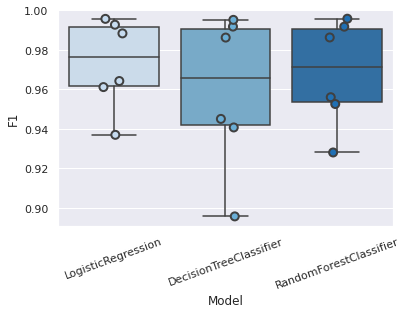

In [63]:
# Visualizing F1 score results through box-plot.
ax = sns.boxplot(x='Model', y='F1', data=methods, palette="Blues")
sns.stripplot(x='Model', y='F1', data=methods,
              size=8, jitter=True, edgecolor="gray", linewidth=2, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.show()

Plot for Logistic regression


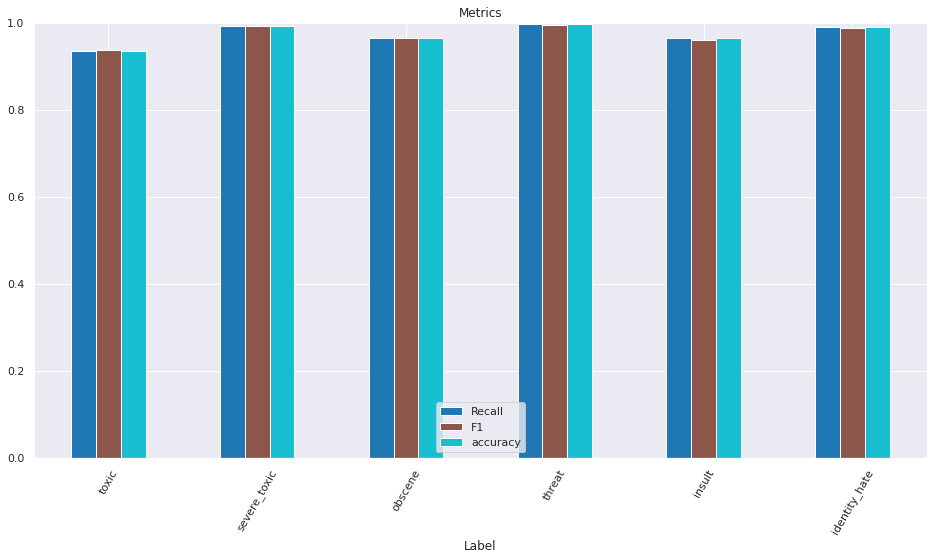

In [64]:
# Code to create bar graph of F1 and Recall across each label for Logistic regression
print("Plot for Logistic regression")
m2 = methods[methods.Model == 'LogisticRegression']

m2.set_index(["Label"], inplace=True)
%matplotlib inline
m2.plot(figsize=(16, 8), kind='bar', title='Metrics',
        rot=60, ylim=(0.0, 1), colormap='tab10')

In [67]:
def drawConfusionMatrix(cm):
    """
    Plot Confusion matrix of input cm.
    """
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    ax = plt.axes()
    sns.heatmap(cm,
                annot=True,
                annot_kws={"size": 16},
                cmap="Blues",
                fmt='.2f',
                linewidths=2,
                linecolor='steelblue',
                xticklabels=("Non-toxic", "Toxic"),
                yticklabels=("Non-toxic", "Toxic"))

    plt.ylabel('True', fontsize=18)
    plt.xlabel('Predicted', fontsize=18)
    plt.show()

In [68]:
def Matrix(label):
    """
    Plot Confusion matrix for each label and call function drawConfusionMatrix().
    """
    print(f"*************** {label} labelling ***************")
    labels = {"toxic": 0, "severe_toxic": 1, "obscene": 2,
              "threat": 3, "insult": 4, "identity_hate": 5}

    pos = labels[label]
    for i in range(pos, len(meth), 6):
        print()
        print(f"****  {meth['Model'][i]}  ***")
        cm = meth['Confusion_Matrix'][i]
        drawConfusionMatrix(cm)

Choose a class for the Confusion Matrix: toxic
*************** toxic labelling ***************

****  LogisticRegression  ***


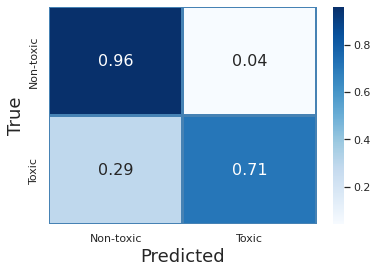


****  DecisionTreeClassifier  ***


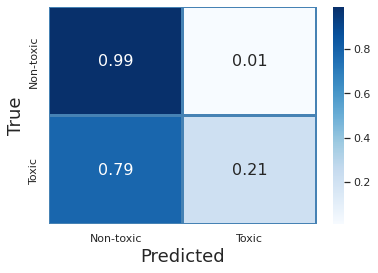


****  RandomForestClassifier  ***


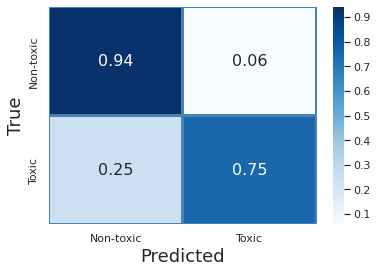

In [69]:
token = input('Choose a class for the Confusion Matrix: ')
Matrix(token.lower())

In [70]:
# Creating a dataframe to summarize Hamming-loss
hl1_df = pd.DataFrame(h1)
hl2_df = pd.DataFrame(h2)
hl3_df = pd.DataFrame(h3)

In [71]:
hammingloss = pd.concat([hl1_df, hl2_df, hl3_df])
hammingloss.columns = ['Model', 'Hamming_Loss']
hl = hammingloss.reset_index()
hl[['Model', 'Hamming_Loss']]

,Model,Hamming_Loss
0,LogisticRegression,0.025670
1,DecisionTreeClassifier,0.033603
2,RandomForestClassifier,0.031344


## 4. Parameter Optimization using GridSearchCV

In [73]:
pipe_lr = Pipeline([
    ('lr', LogisticRegression(class_weight="balanced"))
])

pipe_decision_tree = Pipeline([
    ('dt', DecisionTreeClassifier(class_weight="balanced"))
])

pipelines = [pipe_lr, pipe_decision_tree]

In [76]:
score_df = []
for pipe in pipelines:
    f1_values = []
    recall_values = []
    hl = []
    training_time = []
    accuracy_values = []
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']
    for label in test_labels:
        start = timer()
        pipe.fit(X_train, train[label])
        train_time = timer() - start
        predicted = pipe.predict(X_test)
        predict_df[label] = predicted

        f1_values.append(f1_score(
            test_y[test_y[label] != -1][label], predicted[test_y[label] != -1], average="weighted"))
        recall_values.append(recall_score(
            test_y[test_y[label] != -1][label], predicted[test_y[label] != -1], average="weighted"))
        training_time.append(train_time)
        name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]

        #Here we'll add accuracy using predicted variable

        accuracy_values.append(metrics.accuracy_score(test_y[test_y[label] != -1][label], predicted[test_y[label] != -1]))

    hamming_loss_score = hamming_loss(
        test_y[test_y['toxic'] != -1].iloc[:, 1:7], predict_df[test_y['toxic'] != -1].iloc[:, 1:7])

    val = [name, mean(f1_values), mean(recall_values),
           hamming_loss_score, mean(training_time)]
    score_df.append(val)

In [78]:
scores = pd.DataFrame(score_df,)
scores.columns = ['Model', 'F1', 'Recall', 'Hamming_Loss', 'Training_Time']
scores

,Model,F1,Recall,Hamming_Loss,Training_Time
0,LogisticRegression,0.947934,0.934074,0.065926,4.736459
1,DecisionTreeClassifier,0.929026,0.906129,0.093871,115.900313


In [79]:
logistic_regression_classifier = LogisticRegression()

parameter_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                  'class_weight': [None, 'balanced']}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(logistic_regression_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1')

grid_search.fit(X_train, train['toxic'])

print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best parameters: {'class_weight': None, 'solver': 'liblinear'}


LogisticRegression(solver='liblinear')

In [82]:
dt_classifier = DecisionTreeClassifier()

parameter_grid = {'class_weight': [None, 'balanced'], 'criterion' : ['gini', 'entropy'], 'max_depth' : [2,3]}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(dt_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1')

grid_search.fit(X_train, train['toxic'])

print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3}


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [83]:
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, min_samples_split=2, class_weight=None, random_state=0)

lr_clf = lr_clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                     intercept_scaling=1, max_iter=100, multi_class='multinomial',
                                     n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
                                     tol=0.0001, verbose=0, warm_start=False)

tunned_model_score_df = []
for model in [dt_clf, lr_clf]:
    f1_values = []
    recall_values = []
    hl = []
    training_time = []
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']

    for label in test_labels:
        start = timer()
        model.fit(X_train, train[label])
        training_time.append(timer() - start)
        predicted = model.predict(X_test)
        predict_df[label] = predicted

        f1_values.append(f1_score(test_y[test_y[label] != -1][label],
                                  predicted[test_y[label] != -1],
                                  average="weighted"))
        recall_values.append(recall_score(test_y[test_y[label] != -1][label],
                                          predicted[test_y[label] != -1],
                                          average="weighted"))
        name = model.__class__.__name__

    hamming_loss_score = hamming_loss(test_y[test_y['toxic'] != -1].iloc[:, 1:7],
                                      predict_df[test_y['toxic'] != -1].iloc[:, 1:7])

    val = [name, mean(f1_values), mean(recall_values),
           hamming_loss_score, sum(training_time)]

    tunned_model_score_df.append(val)

In [84]:
tunned_scores = pd.DataFrame(tunned_model_score_df,)
tunned_scores.columns = ['Model', 'F1',
                         'Recall', 'Hamming_Loss', 'Traing_Time']
tunned_scores

,Model,F1,Recall,Hamming_Loss,Traing_Time
0,DecisionTreeClassifier,0.959155,0.966397,0.033603,8.382574
1,LogisticRegression,0.973154,0.973715,0.026285,86.175437
